# Final Report - Data Science 
## Bachelor in Computer Science / PUCPR

Professor Jean Paul Barddal

Daniel Nowak Assis - daniel.nowak@pucpr.edu.br

Enzo Ramon Campa - colocar email

Leandro Ceron Durau - colocar email

Ivson Soares Ferreira Junior - ivson.junior@pucpr.edu.br

2023

# Import the libs you need

In [112]:
# Import all packages you need here
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter
import json
import sys
import json


pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
sys.path.append("./")
# etc

# Loading your data

Below, load the data using pandas and make all the necessary data cleansing so that all data types are correct for posterior analysis.


### Carregamento das Bases
- 1. Dicionário de Dados da Base Sinasc
- 2. Sinasc
- 3. IBGE 2010

In [2]:
# load your data here
"""
df = pd.read_csv("./sinasc_binary_python_sorted.csv")

#http://blog.mds.gov.br/redesuas/lista-de-municipios-brasileiros/
MUN_DIN = pd.read_excel("./Lista-de-Municípios-com-IBGE-Brasil.xlsx", sheet_name=0)
UF_DIN  = pd.read_excel("./Lista-de-Municípios-com-IBGE-Brasil.xlsx", sheet_name=1)

desc_cols = read_json_dict("./desc_coluns.json")

df_idh = pd.read_json("./idh.json")
"""
full_df = pd.read_csv("./sinasc_checkpoint.csv")

In [3]:
#print(full_df.columns)
full_df = full_df.drop(['Unnamed: 0','UF', 'Município', 'ESTADO'], axis= 1)


In [ ]:
# clean and treat the data here
"""
df.shape 

df_idh.shape

MUN_DIN.head(2)

UF_DIN.head(2)

df_idh.head(2)

UF_DIN = UF_DIN[['Estado', 'UF', 'Qtd Mun']]

MUN_DIN = MUN_DIN[['IBGE', 'IBGE7',  'UF', 'Município', 'População 2010']]

df_idh = df_idh.T
df_idh['UF'] = df_idh.index

df.info()

df = df.replace("?", np.nan)

df = df.astype({
                'LOCNASC':    str,
                'IDADEMAE':   float,
                'ESTCIVMAE':  str,
                'QTDFILVIVO': float,
                'QTDFILMORT': float,
                'GRAVIDEZ':   float,
                'PARTO':      str,
                'CONSULTAS':  float,
                'SEXO':       str, 
                'PESO':       float,
                'IDANOMAL':   str,
                'ESCMAE2010': str,
                'QTDGESTANT': float,
                'QTDPARTNOR': float,
                'QTDPARTCES': float,
                'IDADEPAI':   float,
                'TPMETESTIM': str,
                'CONSPRENAT': float,
                'MESPRENAT':  float,
                'TPAPRESENT': str,
                'STTRABPART': str,
                'STCESPARTO': str,
                'TPNASCASSI': str,
                'TPFUNCRESP': str,
                'STDNNOVA':   float, 
                'PARIDADE':   str, 
                'KOTELCHUCK': str, 
                'GESTACAO':   str,
                'STDNEPIDEM': float,
                'PARIDADE':   str
            })

MUN_DIN  = MUN_DIN.rename(columns={"IBGE":"CODMUNNASC"})
df_ibge  = df.merge(MUN_DIN, how="left", on = "CODMUNNASC")\
            .merge(UF_DIN,   how="left", on = "UF")\
            .merge(df_idh,   how="left", on = "UF")

full_df = df_ibge.copy()
full_df = desc_columns(full_df, desc_cols)

full_df.head(2)

full_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))
full_df = full_df.drop(['UF', 'Município'], axis = 1)
"""


'\ndf.shape \n\ndf_idh.shape\n\nMUN_DIN.head(2)\n\nUF_DIN.head(2)\n\ndf_idh.head(2)\n\nUF_DIN = UF_DIN[[\'Estado\', \'UF\', \'Qtd Mun\']]\n\nMUN_DIN = MUN_DIN[[\'IBGE\', \'IBGE7\',  \'UF\', \'Município\', \'População 2010\']]\n\ndf_idh = df_idh.T\ndf_idh[\'UF\'] = df_idh.index\n\ndf.info()\n\ndf = df.replace("?", np.nan)\n\ndf = df.astype({\n                \'LOCNASC\':    str,\n                \'IDADEMAE\':   float,\n                \'ESTCIVMAE\':  str,\n                \'QTDFILVIVO\': float,\n                \'QTDFILMORT\': float,\n                \'GRAVIDEZ\':   float,\n                \'PARTO\':      str,\n                \'CONSULTAS\':  float,\n                \'SEXO\':       str, \n                \'PESO\':       float,\n                \'IDANOMAL\':   str,\n                \'ESCMAE2010\': str,\n                \'QTDGESTANT\': float,\n                \'QTDPARTNOR\': float,\n                \'QTDPARTCES\': float,\n                \'IDADEPAI\':   float,\n                \'TPMETESTI

In [ ]:
# use as many code and text cells you wish

# General Characteristics

In this section, you should report the main dataset chracteristics, including but not limited to:
* Number of instances
* Number of features
* Number of classes
* Class distribution

In [ ]:
# use as many code and text cells you wish
shape = full_df.shape
print(f"O dataset tem {shape[0]} instâncias e {shape[1] - 1} atributos (sem a classe)")

O dataset tem 2642812 instâncias e 30 atributos (sem a classe)


In [ ]:
print(f"O dataset tem {full_df['GESTACAO'].nunique()} classes")

O dataset tem 2 classes


In [ ]:
value_counts = full_df['GESTACAO'].value_counts()
print(f"classe 0 tem {value_counts[0]} exemplos e a classe 1 tem {value_counts[1]} exemplos")

classe 0 tem 2339162 exemplos e a classe 1 tem 303650 exemplos


# Univariate data analysis

In this section, you should perform univariate data analysis on at least 20 variables. 

In the end, you should describe the main variables that are of your interest, and these should be accounted for in the next sections of the report.
The definition of each variable chosen should be clarified, so arbitrary selections are **not** accepted at this point.

For each variable plotted, make sure you determine the following:
1. The distribution of the data (gaussian, binomial, exponential, etc)
2. Skew
3. Kurtosis
4. Mean, standard deviation, and what they stand for in the context of the dataset

Regardless of the type of the variable being analyzed, make sure you plot it correctly. For instance, make sure scatterplots are not used for categorical data and so forth.

In [ ]:
# place as many cells to plot the visualizations, 
# as well as to describe the main findings

### DANIEL 

## 1. Qual é a distribuição de pesos dos recém-nascidos?

<Axes: xlabel='PESO'>

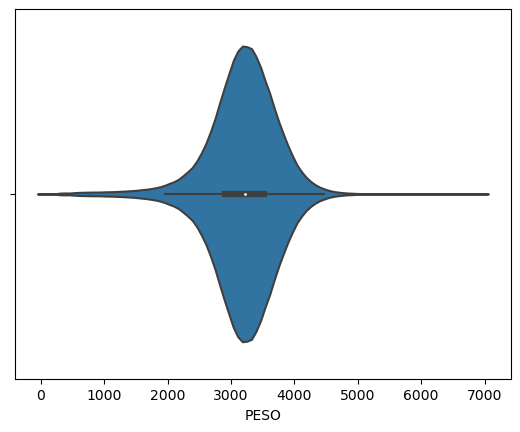

In [ ]:
peso_feto = full_df['PESO']
#print(peso_feto.head())
sns.violinplot(x = peso_feto)

Aparentemente segue uma curva normal, porém é perceptivel são mais esparsos para valores mais baixos como 2000 e abaixo comparado a densidade presente no lado direito.

In [ ]:
#peso_feto.plot(kind='density')

In [ ]:
peso_feto.describe()

count    2.642374e+06
mean     3.178913e+03
std      5.631564e+02
min      3.000000e+00
25%      2.900000e+03
50%      3.215000e+03
75%      3.525000e+03
max      7.000000e+03
Name: PESO, dtype: float64

In [ ]:
peso_feto.skew()

-0.8916472349547755

Assimetrica negativa comprova que os valores mais baixos de peso são mais esparsos  

## 2. Qual a frequência do índice de Kotelchuck?

In [ ]:
kotelchuck = full_df['KOTELCHUCK']

<Axes: xlabel='KOTELCHUCK', ylabel='count'>

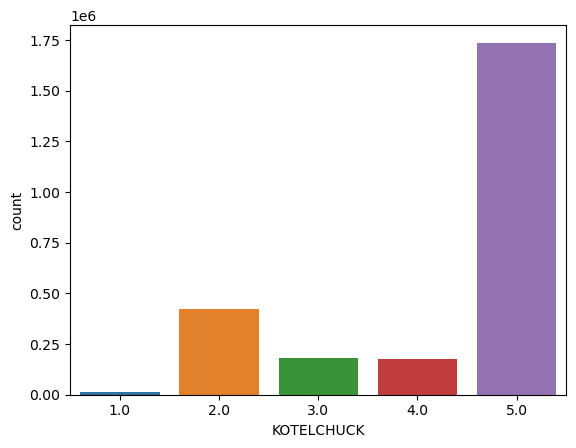

In [ ]:
sns.countplot(x = kotelchuck)

Índice de Kotelchuck é uma métrica de qualidade de ida a consultas pré-natal. Quanto maior o indice, mais a mãe teve consultas pré natal. Maior parte dos exemplos de parto foram com mães que fizeram consultas consideradas "mais do que adequado" para o índice de Kotelchuck.

Apesar de não ser causa-efeito, o índice de kotelchuck pode indicar o motivo do dataset ter desbalanceamento de classe, dado que o acompanhamento médico é uma das melhores prevensões segundo explicado em https://www.gov.br/ebserh/pt-br/hospitais-universitarios/regiao-sudeste/hc-ufmg/comunicacao/noticias/prematuridade-pre-natal-adequado-e-a-melhor-forma-de-prevencao  

## 3. Qual a porcentagem de récem-nascidos do sexo masculino e feminino?

In [ ]:
sexo = full_df[full_df['SEXO'] != 0]['SEXO']

In [ ]:
sexo.nunique()

2

<Axes: xlabel='SEXO', ylabel='count'>

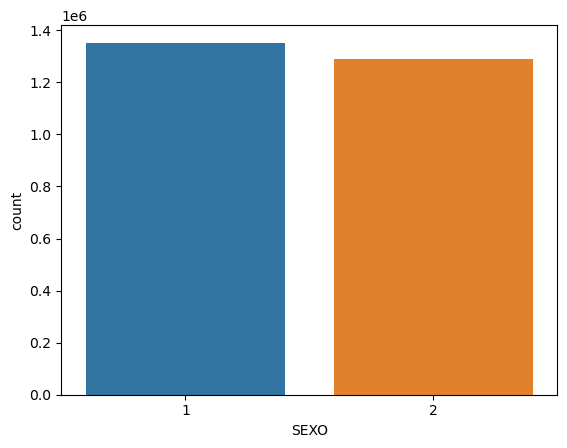

In [ ]:
sns.countplot(x = sexo)

In [ ]:
counts = sexo.value_counts()

In [ ]:
print(f"{ round(counts[2]/ shape[0],4)} % dos recém-nascidos são do sexo feminino")

0.4883 % dos recém-nascidos são do sexo feminino


In [ ]:
print(f"{ round(counts[1]/ shape[0],4)} % dos recém-nascidos são do sexo masculino")

0.5116 % dos recém-nascidos são do sexo masculino


Os valores são próximos do esperado (50/50).

Vamos verificar se há alguma diferença entre recém-nascidos do sexo feminimo e masculino na análise multivariada.

## 4. Quantos casos tem de mães que já perderam outros filhos em gravidez anterior?

In [ ]:
fil_mort =full_df['QTDFILMORT']

In [ ]:
fil_mort.value_counts()

0.0     2047955
1.0      411617
2.0       79060
3.0       17818
4.0        4360
5.0        1436
6.0         578
7.0         209
8.0         136
10.0        114
9.0          74
11.0         27
99.0         11
12.0         10
20.0          8
13.0          7
14.0          5
15.0          4
19.0          3
26.0          2
17.0          2
30.0          1
28.0          1
22.0          1
24.0          1
21.0          1
Name: QTDFILMORT, dtype: int64

In [60]:
fil_mort = full_df[full_df['QTDFILMORT'] <= 4]['QTDFILMORT']

In [ ]:
fil_mort.value_counts()

0.0    2047955
1.0     411617
2.0      79060
3.0      17818
4.0       4360
Name: QTDFILMORT, dtype: int64

<Axes: xlabel='QTDFILMORT', ylabel='count'>

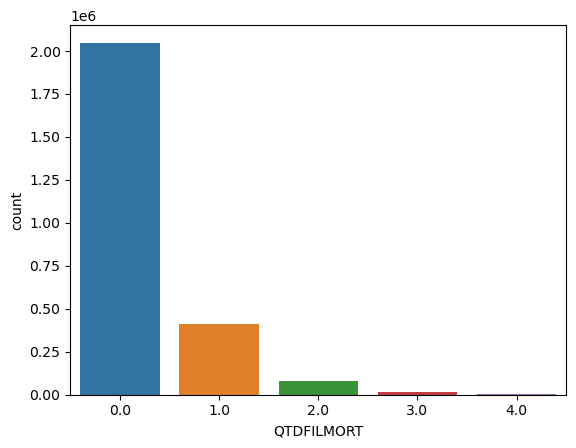

In [ ]:
sns.countplot(x = fil_mort)

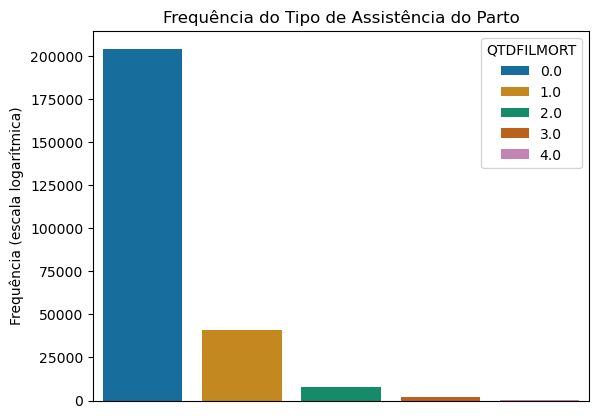

In [66]:
fil_mort = full_df[full_df['QTDFILMORT'] <= 4]
ax = sns.countplot(data=fil_mort, x='QTDFILMORT', hue='QTDFILMORT', dodge=False, palette='colorblind')
ax.set(xlabel=None)
plt.ylabel('Frequência (escala logarítmica)')
plt.title("Frequência do Tipo de Assistência do Parto")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.show()

Em maioria dos partos, a mulher havia tido 0 percas.

É notavel que alguns casos improváveis se apresentam nesse dataset. Por exemplo, 11 casos em que mulheres obtiveram 99 percas anteriores ao parto, que indicia possívelmente ruído por parte dos anotadores no hospital.

## 5. Qual o número de consultas pré-natal realizadas pelas mães? 

In [ ]:
prenat =full_df['CONSPRENAT']

[]

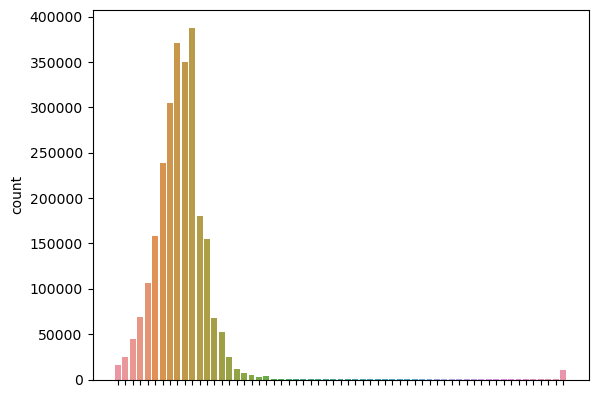

In [ ]:
sns.countplot(x = prenat).set(xlabel=None)
plt.tick_params(labelbottom = False)
plt.plot()

Como peso, o número de consultas pré-natal aparenta ser uma distribuição normal. É notavel que um valor elevado apresenta-se como ruido

In [ ]:
prenat.describe()

count    2.595710e+06
mean     8.728230e+00
std      6.648187e+00
min      0.000000e+00
25%      6.000000e+00
50%      8.000000e+00
75%      1.000000e+01
max      9.900000e+01
Name: CONSPRENAT, dtype: float64

sendo o valor máximo possívelmente o ruído.

### IVSON

### 1. Qual é a Frequência dos Tipos de Assistência do Parto ?


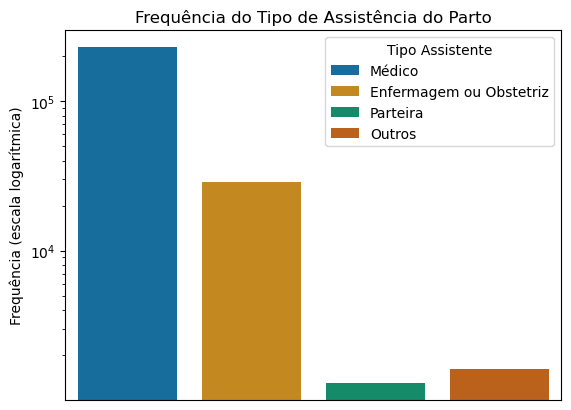

In [143]:
assist_parto = full_df[['TPNASCASSI']]
ax = sns.countplot(data=assist_parto[assist_parto['TPNASCASSI'] != 'nan'], x='TPNASCASSI', hue='TPNASCASSI', dodge=False, palette='colorblind')
ax.set_yscale('log')
ax.set(xlabel=None)
plt.ylabel('Frequência (escala logarítmica)')
plt.title("Frequência do Tipo de Assistência do Parto")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.legend(title='Tipo Assistente')
plt.show()

### Com base no gráfico acima podemos observar que apesar da assistência médica durante o parto ser mais comum, a soma dos outros tipos correspondem a quase metade do total. Dessa forma, fica evidente que um parto não é um procedimento predominantemente médico


### 2. Qual a distribuição dos tipos de apresentação do Recém Nascido na hora do parto


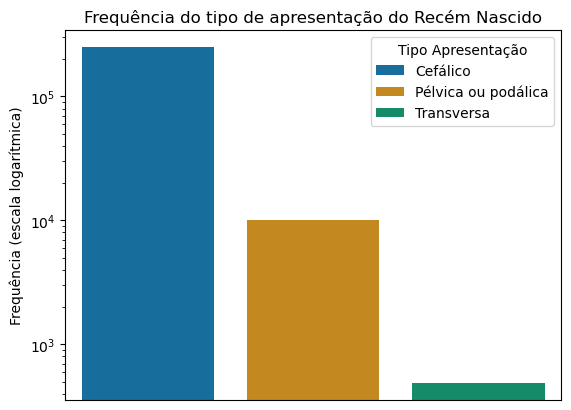

In [142]:
aprs_rn = full_df[['TPAPRESENT']]
ax = sns.countplot(data=aprs_rn[aprs_rn['TPAPRESENT'] != 'nan'], x='TPAPRESENT', hue='TPAPRESENT', dodge=False, palette='colorblind')
ax.set_yscale('log')
ax.set(xlabel=None)

plt.ylabel('Frequência (escala logarítmica)')
plt.title("Frequência do tipo de apresentação do Recém Nascido")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.legend(title='Tipo Apresentação')
plt.show()

### A apresentação cefálica é a mais comum, apesar da apresentação pélvica também ser relevante. Complicações relacionadas ao tipo de apresentação depende de outros fatores, contudo fica claro que a transversal é um evento raro, o que contribui para um parto mais seguro


## 3. Levanto em conta que o parto não é predominantemente um procedimento médico e que a apresentação do recém nascido contribui para um parto normal, qual é a distribuição dos tipos de parto?


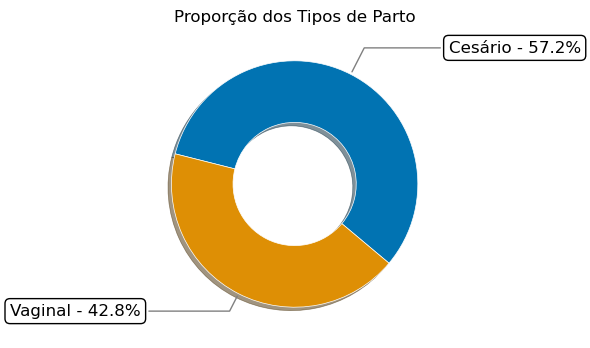

In [141]:
palette_color = sns.color_palette('colorblind')
gp_parto = full_df[(full_df['PARTO'] != 'nan') & (full_df['PARTO'] != 'Ignorado') ]\
                .groupby('PARTO')\
                .agg(contagem=("PARTO", 'count'))\
                .reset_index()

palette_color = sns.color_palette('colorblind')

fig, ax = plt.subplots(figsize=(12, 4), subplot_kw=dict(aspect="equal"))
labels = gp_parto['PARTO'].unique()
wedges, texts= ax.pie(x=gp_parto['contagem'], pctdistance=0.8, colors=palette_color, 
                               wedgeprops=dict(width=0.5, edgecolor='w', linewidth=0.5),
                               shadow=True,
                               startangle=-40)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    percentage_value = f"{gp_parto['contagem'].values[i] / sum(gp_parto['contagem']) * 100:.1f}%"
    ax.annotate(f"{labels[i]} - {percentage_value}", xy=(x, y), xytext=(1.25 * np.sign(x), 1.2 * y),
                fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='w', lw=1),
                horizontalalignment=horizontalalignment,
                arrowprops=dict(arrowstyle="-", lw=1, color='grey', connectionstyle=connectionstyle))

plt.title("Proporção dos Tipos de Parto")
plt.show()

### Apesar dos resultados obtidos nos primeiros gráficos(Tipo de Assistente, Tipo de Apresentação do Recém Nascido), o parto Vaginal(normal) não é predominante. Esse é um tema debatido na sociedade atualmente, porém com o conjunto de dados atual, somado ao escopo do estudo, não mergulharemos nesse linha de investigação.


### TODO - Investigar idade da mãe


C:\Users\ivson\AppData\Local\Temp\ipykernel_18140\1341977224.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.displot(aprs_rn[aprs_rn['IDADEMAE'] != 'nan'], x='IDADEMAE',  binwidth=5, palette='colorblind')


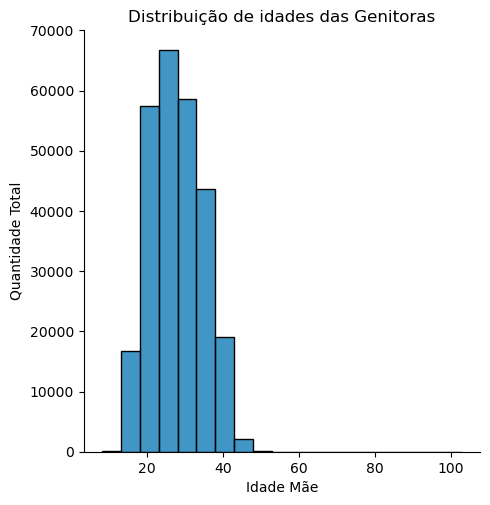

In [140]:
aprs_rn = full_df[['IDADEMAE']]
ax = sns.displot(aprs_rn[aprs_rn['IDADEMAE'] != 'nan'], x='IDADEMAE',  binwidth=5, palette='colorblind')
plt.xlabel('Idade Mãe')
plt.ylabel('Quantidade Total')
plt.title("Distribuição de idades das Genitoras")
plt.show()

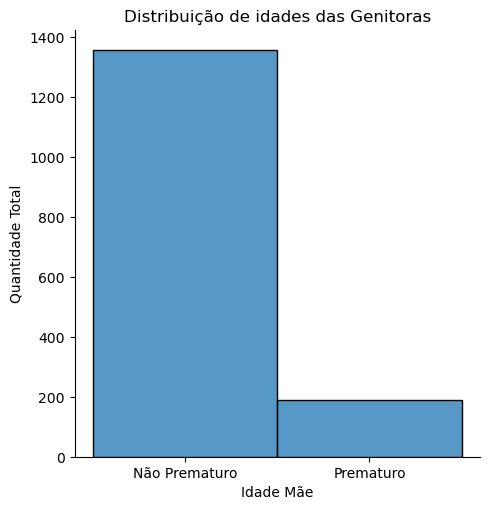

In [ ]:
aprs_rn_morto = full_df[(full_df['QTDFILMORT'] > 10 ) & (full_df['QTDGESTANT'] <= 0)]
ax = sns.displot(aprs_rn_morto[aprs_rn_morto['GESTACAO'] != 'nan'], x='GESTACAO',  binwidth=5)
plt.xlabel('Idade Mãe')
plt.ylabel('Quantidade Total')
plt.title("Distribuição de idades das Genitoras")
plt.show()

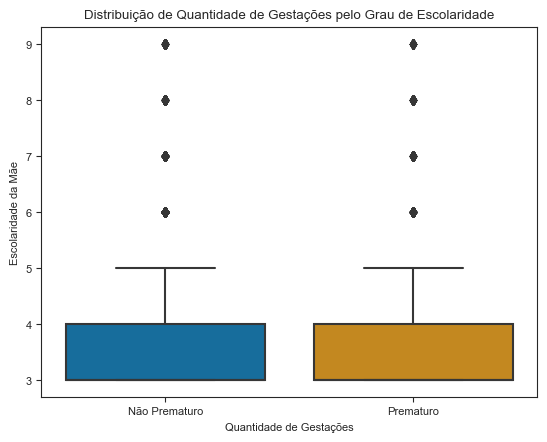

In [ ]:
esc_gest = full_df[(full_df['QTDFILMORT'] >= 3) & (full_df['QTDFILMORT'] < 10)]
sns.boxplot(y=esc_gest['QTDFILMORT'], x=esc_gest['GESTACAO'], palette='colorblind')
plt.xlabel("Quantidade de Gestações")
plt.ylabel("Escolaridade da Mãe")
plt.title("Distribuição de Quantidade de Gestações pelo Grau de Escolaridade")
plt.show()

## 4. Sabemos que o fato de gerar um pessoa custa tempo e esforço, principalmente da genitora. Dessa forma, qual seria o impacto na educação dessas mulheres


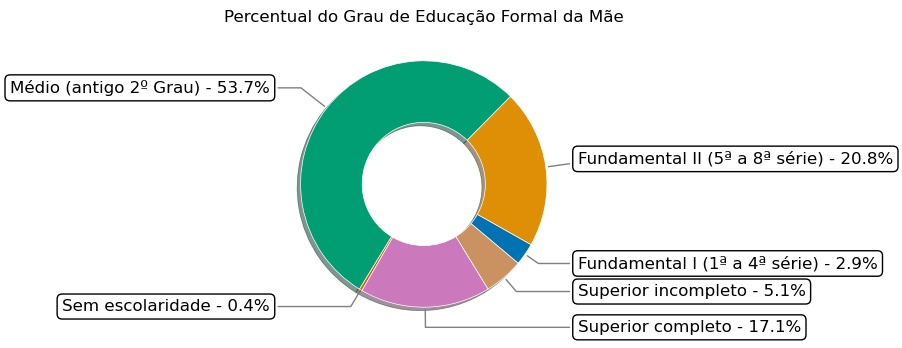

In [ ]:
esc_mae = full_df[full_df['ESCMAE2010'] != 'nan'].groupby('ESCMAE2010').agg(contagem=('ESCMAE2010', 'count')).reset_index()
palette_color = sns.color_palette('colorblind')

fig, ax = plt.subplots(figsize=(12, 4), subplot_kw=dict(aspect="equal"))
labels = esc_mae['ESCMAE2010'].unique()
wedges, texts= ax.pie(x=esc_mae['contagem'], pctdistance=0.8, colors=palette_color, 
                               wedgeprops=dict(width=0.5, edgecolor='w', linewidth=0.5),
                               shadow=True,
                               startangle=-40)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    percentage_value = f"{esc_mae['contagem'].values[i] / sum(esc_mae['contagem']) * 100:.1f}%"
    ax.annotate(f"{labels[i]} - {percentage_value}", xy=(x, y), xytext=(1.25 * np.sign(x), 1.2 * y),
                fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='w', lw=1),
                horizontalalignment=horizontalalignment,
                arrowprops=dict(arrowstyle="-", lw=1, color='grey', connectionstyle=connectionstyle))

plt.title("Percentual do Grau de Educação Formal da Mãe")
plt.show()

### Apesar de 82,9% dessas mulheres não completarem o ensino superior não podemos inferir que esta seja a causa desse problema devido aos diversos fatores o compõe, contudo podemos observar como o grau de escolaridade impacta na quantidade de filhos


## 5. Atualmente muito se discute sobre antinatalismo, nesse sentido o que nossos dados nos contam sobre isso?


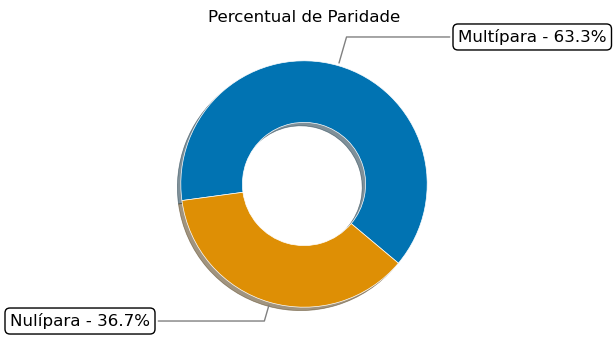

In [ ]:
par_mae = full_df[full_df['PARIDADE'] != 'nan'].groupby('PARIDADE').agg(contagem=('PARIDADE', 'count')).reset_index()
palette_color = sns.color_palette('colorblind')

fig, ax = plt.subplots(figsize=(12, 4), subplot_kw=dict(aspect="equal"))
labels = par_mae['PARIDADE'].unique()
wedges, texts= ax.pie(x=par_mae['contagem'], pctdistance=0.8, colors=palette_color, 
                               wedgeprops=dict(width=0.5, edgecolor='w', linewidth=0.5),
                               shadow=True,
                               startangle=-40)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    percentage_value = f"{par_mae['contagem'].values[i] / sum(par_mae['contagem']) * 100:.1f}%"
    ax.annotate(f"{labels[i]} - {percentage_value}", xy=(x, y), xytext=(1.25 * np.sign(x), 1.2 * y),
                fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='w', lw=1),
                horizontalalignment=horizontalalignment,
                arrowprops=dict(arrowstyle="-", lw=1, color='grey', connectionstyle=connectionstyle))
plt.title("Percentual de Paridade")
plt.show()

### Relacionar isso ao movimento antinatalista pode ser um exagero, porém como pode ser obversado é mais provável que alguém que já teve um filho tenha outro.

# Multivariate data analysis

In this section, you should plot at least 8 multivariate visualizations. The key here is to investigate underlying correlations and behaviors in the dataset.
Naturally, as visualizations are being created, we should end up with obvious results, yet, you should find at least **TWO** non-obvious behavior in data.

Please follow these steps for creating your visualizations:
1. State an hypothesis. The key here is to explain why you are choosing those specific variables together and what you are expecting to find.
2. Determine what kind of visualization is the most suited.
3. Report the findings and whether they corroborate or not the aforestated hypothesis.


### Hints

In this section, make sure you go beyond naive explorations. For instance, try PCA, t-SNE, and even other techniques we have not worked with during the lectures. The key here is to start to develop a critical mindset towards data analysis and our own work.

### Important

It is strictly forbidden to create multivariate visualizations using variables that were not used in the previous section (univariate analysis).

In [ ]:
# again, feel free to place as many cells to plot the visualizations, 
# as well as describe to the main findings

### Qual a relação entre o número de gestações e a escolaridade

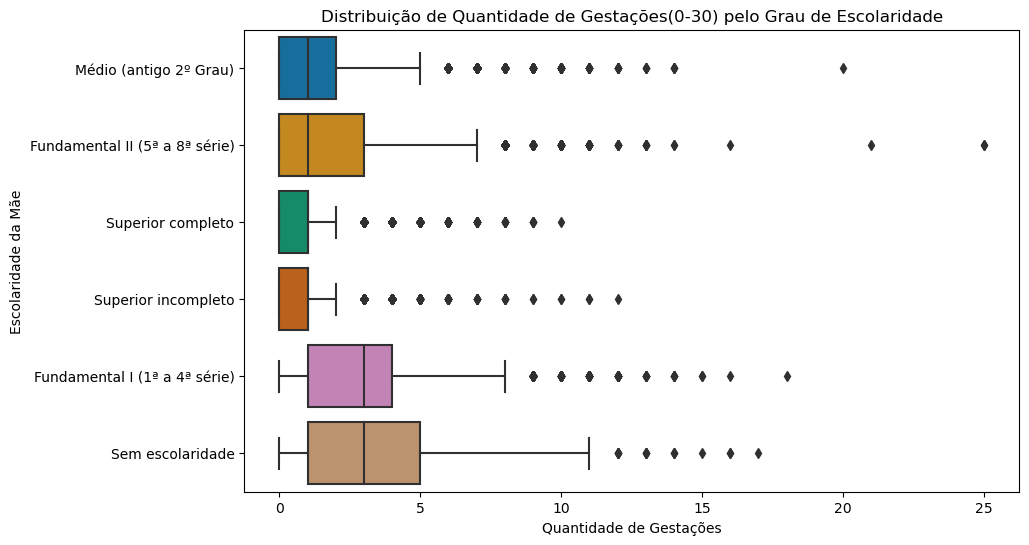

In [139]:
esc_gest = full_df[(full_df['QTDGESTANT'] < 30) &  (full_df['ESCMAE2010'] != 'nan')]
plt.figure(figsize=(10, 6))
sns.boxplot(y=esc_gest['ESCMAE2010'], x=esc_gest['QTDGESTANT'], orient='h', palette='colorblind')
plt.xlabel("Quantidade de Gestações")
plt.ylabel("Escolaridade da Mãe")
plt.title("Distribuição de Quantidade de Gestações(0-30) pelo Grau de Escolaridade")
plt.show()

#### Apesar de termos visto anteriormente que a maior parte das gestações são de mulheres que concluíram o ensino médio. Nessa gráfico fica claro que quanto maior o grau de escolaridade, menor o número de gestações.

### Qual a distribuição das mulheres gestantes pela escolaridade e estado civil


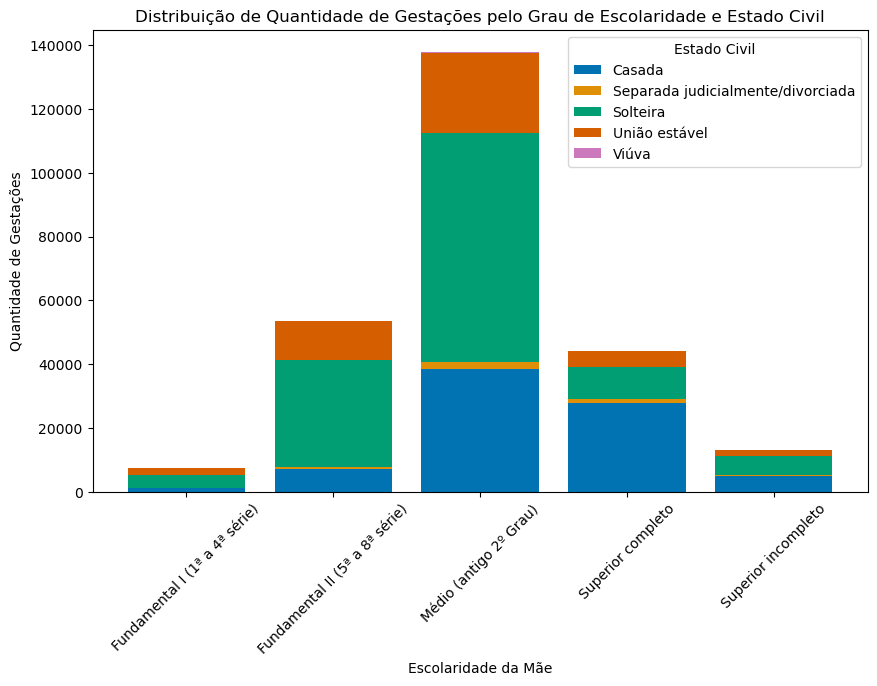

In [137]:
esc_tp_par = full_df[(full_df['ESCMAE2010']      != 'nan') & (full_df['ESCMAE2010']      != 'Sem escolaridade') &
                     (full_df['ESTCIVMAE'] != "nan") & (full_df['ESTCIVMAE'] != "Ignorado")]

count_data = esc_tp_par.groupby(['ESTCIVMAE', 'ESCMAE2010']).size().reset_index(name='Count')

# Pivot the DataFrame to create a format suitable for a stacked bar chart
pivot_data = count_data.pivot(index='ESCMAE2010', columns='ESTCIVMAE', values='Count').fillna(0)

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
sns.set_palette('colorblind')
ax = sns.barplot(data=pivot_data, x=pivot_data.index, y=pivot_data.sum(axis=1))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
bottom = 0

for col in pivot_data.columns:
    ax.bar(pivot_data.index, pivot_data[col], label=col, bottom=bottom)
    bottom += pivot_data[col]


plt.xlabel("Escolaridade da Mãe")
plt.ylabel("Quantidade de Gestações")
plt.title("Distribuição de Quantidade de Gestações pelo Grau de Escolaridade e Estado Civil")
plt.legend(title='Estado Civil')
plt.xticks(rotation=45)
plt.show()

### Podemos ver que quanto maior o grau de escolaridade mais mulheres se encontram em estado civil casada. Contudo, o mais interessante é observarmos como a união estável é um estado civil que se aproxima ou ultrapassa a quantidade de casamentos nos graus mais baixos de escolaridadeices here

## TODO - Ivson 2 - Multi Variada 2 - Efetivas

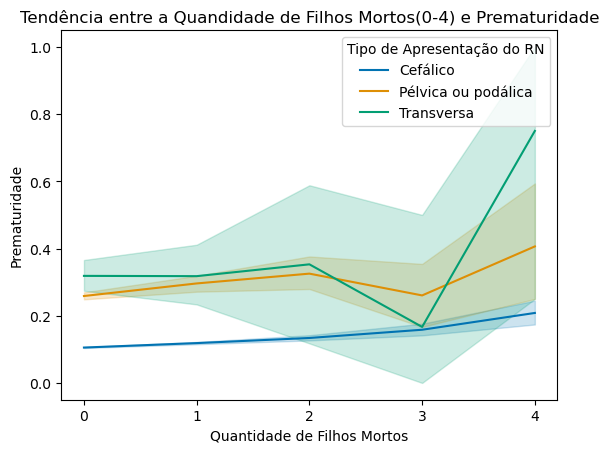

In [134]:
#MultiVariada 1
esc = full_df[['QTDFILMORT', 'GESTACAO', 'TPAPRESENT']][full_df['QTDFILMORT'] < 5]
esc['GESTACAO'] = esc['GESTACAO'].replace("Prematuro", 1).replace("Não Prematuro", 0)
sns.lineplot(data=esc, x="QTDFILMORT", y="GESTACAO", hue='TPAPRESENT')
plt.xticks(range(0, 5))
plt.xlabel("Quantidade de Filhos Mortos")
plt.ylabel("Prematuridade")
plt.title("Tendência entre a Quandidade de Filhos Mortos(0-4) e Prematuridade")
plt.legend(title='Tipo de Apresentação do RN')
plt.show()

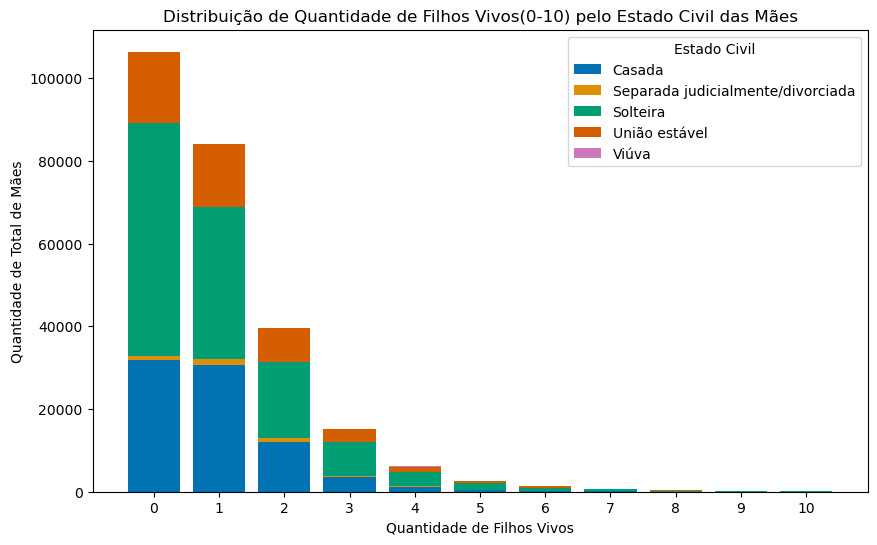

In [135]:
#Efetiva 1
maes_est_civ = full_df[full_df['QTDFILVIVO'] <= 10]
count_data = maes_est_civ.groupby(['ESTCIVMAE', 'QTDFILVIVO']).size().reset_index(name='Count')

pivot_data = count_data.pivot(index='QTDFILVIVO', columns='ESTCIVMAE', values='Count').fillna(0)

plt.figure(figsize=(10, 6))
sns.set_palette('colorblind')
ax = sns.barplot(data=pivot_data, x=pivot_data.index.astype(int), y=pivot_data.sum(axis=1))
bottom = 0

for col in pivot_data.columns:
    ax.bar(pivot_data.index, pivot_data[col], label=col, bottom=bottom)
    bottom += pivot_data[col]


plt.xlabel("Quantidade de Filhos Vivos")
plt.ylabel("Quantidade de Total de Mães")
plt.title("Distribuição de Quantidade de Filhos Vivos(0-10) pelo Estado Civil das Mães")
plt.legend(title='Estado Civil')
plt.show()

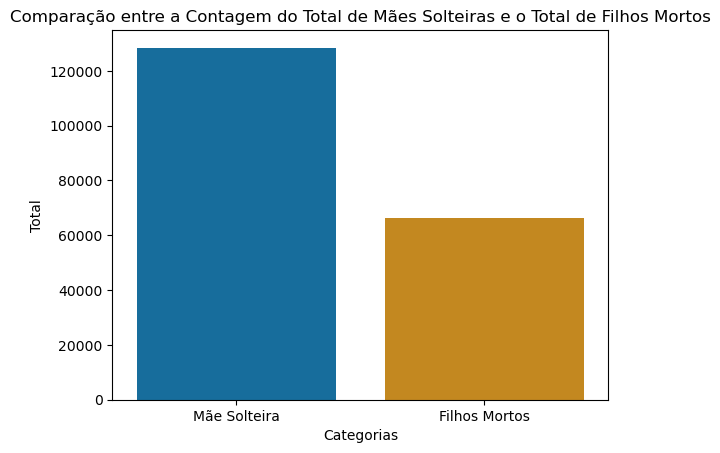

In [130]:
#Multi Variada 2
mae_solo = full_df[full_df['ESTCIVMAE'] == 'Solteira']
filhos_mortos = full_df[full_df['QTDFILMORT'] > 0]

mae_solo_count = mae_solo.shape[0]
filhos_mortos_sum = filhos_mortos['QTDFILMORT'].sum()

data = {'x_': ['Mãe Solteira', 'Filhos Mortos'], 'y_': [mae_solo_count, filhos_mortos_sum]}
sns.barplot(x='x_', y='y_', data=data, palette='colorblind')

plt.xlabel('Categorias')
plt.ylabel('Total')
plt.title('Comparação entre a Contagem do Total de Mães Solteiras e o Total de Filhos Mortos')
plt.show()

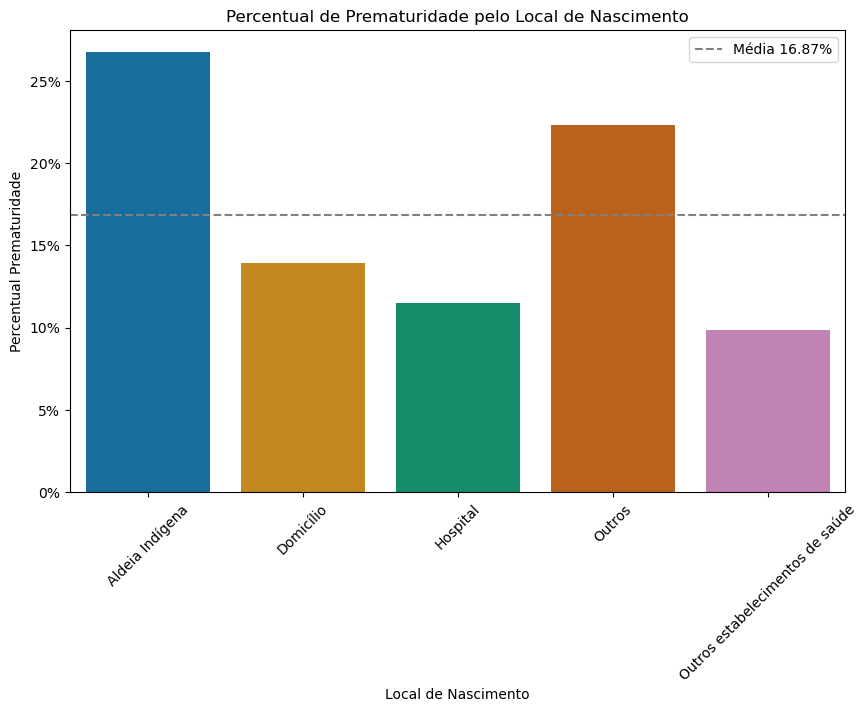

In [129]:
#Efetiva 2
full_df['GESTACAO'] = full_df['GESTACAO'].replace("Não Prematuro", 0).replace("Prematuro", 1)

grouped_data = full_df.groupby('LOCNASC')['GESTACAO'].mean().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='LOCNASC', y='GESTACAO', data=grouped_data, palette='colorblind')
plt.xlabel('Local de Nascimento')
plt.ylabel('Percentual Prematuridade')
plt.title('Percentual de Prematuridade pelo Local de Nascimento')
mean_value = grouped_data['GESTACAO'].mean()
ax.axhline(y=mean_value, color='grey', linestyle='--', label=f'Média {mean_value * 100:.2f}%')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{x * 100:.0f}%'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

## TODO Daniel

#### Validar e mandar mensagem caso necessário

# Final Plots

In this section, you need to enhance 3 multivariate visualizations that were presented in the previous section of the report.
The key here is to enhance these visualizations with the goal of presenting them for an audience that is not familiar with the dataset used or with data analysis.
**Therefore, make sure that its size, colors, textures, etc, are appropriate are convey the right information to the audience.**

For your final plots, make sure you follow these steps:
1. Present the plot
2. Provide a description of the visualization, including the main findings that we can extract from it


**Hint: take a look at the checklist also made available based on the work of Evergreen.**

In [ ]:
# your code goes here

# Digest

In this section you should write down all the main findings of this exploratory data analysis. Furthermore, you should provide a reflection about your own work and effort during the module, highlighting what you believe you have done well and what you should have done differently. This digest should have at least 2500 characters (no spaces).

```
Add your text here.
```

# Final Steps


1. Save this report as a jupyter notebook (`.ipynb`)
2. Save a copy of this report as a PDF file (`.pdf`)
3. Copy the dataset
4. Zip it all together within a single file (`<your_team_name>.zip`)
5. Send it over using Blackboard.